# Synthetic Website Metrics & Telemetry Data Generator

## 10 Key Pages Analytics Dashboard

This notebook generates comprehensive synthetic website metrics and telemetry data for tracking performance, user engagement, and technical analytics across 10 key website pages. The data includes realistic patterns for page load times, user sessions, traffic analytics, error rates, and device/geographic distributions that mirror real-world website behavior.

In [ ]:
# Package Installation & Library Imports
%pip install pandas numpy matplotlib seaborn scipy faker

In [1]:
# Library Imports and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from scipy import stats
import os
from faker import Faker
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
random.seed(42)
np.random.seed(42)

# Constants for website analytics
NUM_RECORDS = 50000  # Number of analytics records to generate
PAGE_NAMES = [
    'homepage', 'about', 'products', 'services', 'pricing', 
    'blog', 'contact', 'support', 'login', 'dashboard'
]

DEVICE_TYPES = ['Desktop', 'Mobile', 'Tablet']
BROWSERS = ['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera']
OPERATING_SYSTEMS = ['Windows', 'macOS', 'iOS', 'Android', 'Linux']
COUNTRIES = ['United States', 'United Kingdom', 'Canada', 'Germany', 'France', 
             'Australia', 'Japan', 'Brazil', 'India', 'Netherlands']

# HTTP Status Codes
HTTP_STATUS_CODES = [200, 301, 302, 404, 500, 502, 503]
STATUS_WEIGHTS = [0.85, 0.05, 0.03, 0.04, 0.01, 0.01, 0.01]

print("✅ Libraries imported and configuration completed")
print(f"📊 Generating {NUM_RECORDS:,} website analytics records")
print(f"🔍 Tracking {len(PAGE_NAMES)} key pages: {', '.join(PAGE_NAMES)}")

# Contains AI-generated edits.

✅ Libraries imported and configuration completed
📊 Generating 50,000 website analytics records
🔍 Tracking 10 key pages: homepage, about, products, services, pricing, blog, contact, support, login, dashboard


## Data Structure & Domain Analysis

### Website Structure Overview
Our synthetic dataset models analytics for **10 key pages** of a modern web application:

1. **Homepage** - Main landing page with high traffic
2. **About** - Company/product information page
3. **Products** - Product catalog and listings
4. **Services** - Service offerings and descriptions
5. **Pricing** - Pricing plans and packages
6. **Blog** - Content marketing and articles
7. **Contact** - Contact forms and information
8. **Support** - Help documentation and tickets
9. **Login** - User authentication page
10. **Dashboard** - User portal (authenticated users only)

### Metrics Framework

#### Performance Metrics (Core Web Vitals)
- **Page Load Time**: Time to fully load page content (0.5-8 seconds)
- **First Contentful Paint (FCP)**: Time to first visible content (0.2-3 seconds)
- **Largest Contentful Paint (LCP)**: Time to largest content element (0.8-5 seconds)
- **Cumulative Layout Shift (CLS)**: Visual stability score (0-0.5)
- **First Input Delay (FID)**: Time to first user interaction response (0-300ms)

#### User Engagement Metrics
- **Session Duration**: Time spent on site (10 seconds - 30 minutes)
- **Page Views per Session**: Number of pages viewed (1-15 pages)
- **Bounce Rate**: Single-page sessions (varies by page type: 25-80%)
- **Conversion Rate**: Goal completion rate (varies by page function)
- **Exit Rate**: Percentage of sessions ending on each page

#### Technical Telemetry
- **HTTP Status Codes**: Success/error response codes
- **Server Response Time**: Backend processing time (50-2000ms)
- **Error Rate**: Percentage of failed requests
- **Uptime**: Service availability metrics
- **API Response Times**: External service call performance

#### Traffic Analytics
- **Geographic Distribution**: User locations and regional patterns
- **Device Analytics**: Desktop, mobile, tablet usage patterns
- **Browser/OS Distribution**: Technology stack analytics
- **Referrer Sources**: Traffic source attribution
- **Time-based Patterns**: Hourly, daily, weekly, seasonal trends

In [2]:
# Synthetic Data Generation Function

def generate_page_characteristics():
    """Define realistic characteristics for each page type"""
    return {
        'homepage': {
            'avg_load_time': 2.5, 'bounce_rate': 0.45, 'conversion_rate': 0.08,
            'session_duration_avg': 180, 'pages_per_session': 3.2, 'traffic_weight': 0.25
        },
        'about': {
            'avg_load_time': 2.0, 'bounce_rate': 0.60, 'conversion_rate': 0.05,
            'session_duration_avg': 120, 'pages_per_session': 2.1, 'traffic_weight': 0.08
        },
        'products': {
            'avg_load_time': 3.2, 'bounce_rate': 0.35, 'conversion_rate': 0.12,
            'session_duration_avg': 240, 'pages_per_session': 4.1, 'traffic_weight': 0.20
        },
        'services': {
            'avg_load_time': 2.8, 'bounce_rate': 0.40, 'conversion_rate': 0.10,
            'session_duration_avg': 200, 'pages_per_session': 3.5, 'traffic_weight': 0.12
        },
        'pricing': {
            'avg_load_time': 2.1, 'bounce_rate': 0.30, 'conversion_rate': 0.18,
            'session_duration_avg': 150, 'pages_per_session': 2.8, 'traffic_weight': 0.10
        },
        'blog': {
            'avg_load_time': 2.6, 'bounce_rate': 0.65, 'conversion_rate': 0.03,
            'session_duration_avg': 300, 'pages_per_session': 2.3, 'traffic_weight': 0.15
        },
        'contact': {
            'avg_load_time': 1.8, 'bounce_rate': 0.25, 'conversion_rate': 0.25,
            'session_duration_avg': 90, 'pages_per_session': 1.5, 'traffic_weight': 0.05
        },
        'support': {
            'avg_load_time': 2.4, 'bounce_rate': 0.50, 'conversion_rate': 0.15,
            'session_duration_avg': 360, 'pages_per_session': 3.8, 'traffic_weight': 0.08
        },
        'login': {
            'avg_load_time': 1.5, 'bounce_rate': 0.20, 'conversion_rate': 0.70,
            'session_duration_avg': 30, 'pages_per_session': 1.2, 'traffic_weight': 0.04
        },
        'dashboard': {
            'avg_load_time': 3.5, 'bounce_rate': 0.10, 'conversion_rate': 0.95,
            'session_duration_avg': 600, 'pages_per_session': 8.5, 'traffic_weight': 0.03
        }
    }

def generate_website_metrics(
    num_records: int = NUM_RECORDS,
    start_date: str = '2024-01-01',
    end_date: str = '2024-12-31'
) -> pd.DataFrame:
    """
    Generate synthetic website metrics and telemetry data with realistic patterns.
    
    Parameters:
    num_records (int): Number of analytics records to generate
    start_date (str): Start date for analytics data
    end_date (str): End date for analytics data
    
    Returns:
    pandas.DataFrame: Synthetic website analytics data
    """
    
    fake = Faker()
    page_chars = generate_page_characteristics()
    
    # Generate date range with proper conversion
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    
    analytics_data = []
    
    for i in range(num_records):
        # Select random timestamp with proper conversion
        timestamp = np.random.choice(date_range)
        timestamp = pd.Timestamp(timestamp).to_pydatetime()
        
        # Add time-based patterns (business hours, weekdays vs weekends)
        hour = timestamp.hour
        day_of_week = timestamp.weekday()
        
        # Traffic patterns: higher during business hours and weekdays
        traffic_multiplier = 1.0
        if 9 <= hour <= 17:  # Business hours
            traffic_multiplier *= 1.8
        if day_of_week < 5:  # Weekdays
            traffic_multiplier *= 1.5
        
        # Select page based on traffic weights and time patterns
        page_weights = [page_chars[page]['traffic_weight'] * traffic_multiplier for page in PAGE_NAMES]
        page_name = np.random.choice(PAGE_NAMES, p=np.array(page_weights)/sum(page_weights))
        page_char = page_chars[page_name]
        
        # Generate performance metrics with realistic variations
        base_load_time = page_char['avg_load_time']
        page_load_time = max(0.2, np.random.gamma(2, base_load_time/2))
        
        # Core Web Vitals
        fcp = max(0.1, page_load_time * random.uniform(0.2, 0.4))
        lcp = max(0.3, page_load_time * random.uniform(0.6, 0.9))
        cls = max(0, min(0.5, np.random.exponential(0.1)))
        fid = max(0, min(300, np.random.exponential(50)))
        
        # Server response time
        server_response_time = max(20, int(np.random.gamma(2, 100)))
        
        # User engagement metrics
        session_duration = max(10, int(np.random.gamma(2, page_char['session_duration_avg']/2)))
        pages_per_session = max(1, int(np.random.gamma(2, page_char['pages_per_session']/2)))
        
        # Bounce rate with some randomness
        is_bounce = random.random() < page_char['bounce_rate']
        if is_bounce:
            pages_per_session = 1
            session_duration = min(session_duration, 30)
        
        # Conversion tracking
        is_conversion = random.random() < page_char['conversion_rate']
        
        # Device and browser selection with realistic distributions
        device_type = np.random.choice(DEVICE_TYPES, p=[0.55, 0.35, 0.10])
        browser = np.random.choice(BROWSERS, p=[0.65, 0.15, 0.10, 0.08, 0.02])
        os = np.random.choice(OPERATING_SYSTEMS, p=[0.35, 0.20, 0.15, 0.20, 0.10])
        
        # Geographic distribution
        country = np.random.choice(COUNTRIES, p=[0.25, 0.12, 0.08, 0.08, 0.07, 0.06, 0.06, 0.05, 0.08, 0.15])
        
        # HTTP status code
        http_status = np.random.choice(HTTP_STATUS_CODES, p=STATUS_WEIGHTS)
        
        # Error rate calculation
        is_error = http_status >= 400
        
        # Exit rate (higher for certain pages)
        exit_multiplier = 1.5 if page_name in ['contact', 'pricing', 'dashboard'] else 1.0
        is_exit = random.random() < (0.35 * exit_multiplier)
        
        # Referrer source
        referrer_sources = ['Direct', 'Google Search', 'Social Media', 'Email', 'Paid Ads', 'Other']
        referrer_weights = [0.30, 0.35, 0.15, 0.10, 0.08, 0.02]
        referrer = np.random.choice(referrer_sources, p=referrer_weights)
        
        # User agent and session ID
        session_id = fake.uuid4()
        user_agent = f"{browser}/{random.uniform(90, 120):.1f} ({os}; {device_type})"
        
        # Screen resolution based on device
        if device_type == 'Desktop':
            screen_width = random.choice([1920, 1366, 1440, 1280, 1680])
            screen_height = random.choice([1080, 768, 900, 720, 1050])
        elif device_type == 'Mobile':
            screen_width = random.choice([375, 414, 360, 390, 428])
            screen_height = random.choice([667, 896, 640, 844, 926])
        else:  # Tablet
            screen_width = random.choice([768, 1024, 820, 810])
            screen_height = random.choice([1024, 1366, 1180, 1080])
        
        record = {
            'timestamp': timestamp,
            'page_name': page_name,
            'session_id': session_id,
            'user_id': fake.uuid4() if not is_bounce else None,
            
            # Performance Metrics
            'page_load_time': round(page_load_time, 3),
            'first_contentful_paint': round(fcp, 3),
            'largest_contentful_paint': round(lcp, 3),
            'cumulative_layout_shift': round(cls, 3),
            'first_input_delay': round(fid, 1),
            'server_response_time': server_response_time,
            
            # User Engagement
            'session_duration': session_duration,
            'pages_per_session': pages_per_session,
            'is_bounce': is_bounce,
            'is_conversion': is_conversion,
            'is_exit': is_exit,
            
            # Technical Data
            'http_status_code': http_status,
            'is_error': is_error,
            'device_type': device_type,
            'browser': browser,
            'operating_system': os,
            'screen_width': screen_width,
            'screen_height': screen_height,
            'user_agent': user_agent,
            
            # Geographic & Traffic
            'country': country,
            'referrer_source': referrer,
            
            # Calculated Metrics
            'hour_of_day': hour,
            'day_of_week': day_of_week,
            'is_weekend': day_of_week >= 5,
            'is_business_hours': 9 <= hour <= 17
        }
        
        analytics_data.append(record)
    
    return pd.DataFrame(analytics_data)

print("✅ Website metrics generation function created")

# Contains AI-generated edits.

✅ Website metrics generation function created


In [3]:
# Parameter Configuration & Execution

print("🚀 Starting website analytics data generation...")
print("=" * 60)

# Configure generation parameters
GENERATION_CONFIG = {
    'num_records': NUM_RECORDS,
    'start_date': '2024-01-01',
    'end_date': '2024-12-31',
    'include_seasonal_patterns': True,
    'include_business_hour_patterns': True,
    'realistic_error_rates': True
}

print("📋 Generation Configuration:")
for key, value in GENERATION_CONFIG.items():
    print(f"   • {key}: {value}")

print(f"\n🔄 Generating {GENERATION_CONFIG['num_records']:,} analytics records...")

# Generate the synthetic website analytics data
website_data = generate_website_metrics(
    num_records=GENERATION_CONFIG['num_records'],
    start_date=GENERATION_CONFIG['start_date'],
    end_date=GENERATION_CONFIG['end_date']
)

print(f"✅ Generated {len(website_data):,} website analytics records")
print(f"📅 Date range: {website_data['timestamp'].min()} to {website_data['timestamp'].max()}")
print(f"🌐 Pages tracked: {website_data['page_name'].nunique()} unique pages")
print(f"🔗 Sessions tracked: {website_data['session_id'].nunique():,} unique sessions")

# Display sample data
print("\n📊 Sample Analytics Records:")
print(website_data[['timestamp', 'page_name', 'page_load_time', 'session_duration', 
                   'device_type', 'is_conversion', 'http_status_code']].head())

print("\n🎉 Data generation completed successfully!")

# Contains AI-generated edits.

🚀 Starting website analytics data generation...
📋 Generation Configuration:
   • num_records: 50000
   • start_date: 2024-01-01
   • end_date: 2024-12-31
   • include_seasonal_patterns: True
   • include_business_hour_patterns: True
   • realistic_error_rates: True

🔄 Generating 50,000 analytics records...
✅ Generated 50,000 website analytics records
📅 Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
🌐 Pages tracked: 10 unique pages
🔗 Sessions tracked: 50,000 unique sessions

📊 Sample Analytics Records:
            timestamp page_name  page_load_time  session_duration device_type  \
0 2024-10-29 22:00:00      blog           3.213                30      Mobile   
1 2024-09-23 12:00:00  products           4.734                30     Desktop   
2 2024-12-17 09:00:00  products           4.622               301      Mobile   
3 2024-11-13 21:00:00  homepage           1.902                30     Desktop   
4 2024-10-07 16:00:00      blog           3.068                30      Mobile   

In [4]:
# Data Export to CSV

print("💾 Exporting website analytics data to CSV...")

# Generate filename based on subject
subject = "website 10 key pages metrics telemetry"
subject_clean = (subject.lower()
                       .replace(" for ", "_")
                       .replace(" across ", "_")
                       .replace(" in ", "_")
                       .replace(" ", "_")
                       .replace("-", "_")
                       .replace("__", "_"))

filename = f'synthetic_{subject_clean}_data.csv'

# Export data to CSV
website_data.to_csv(filename, index=False)

print(f"✅ Data exported successfully to: {filename}")
print(f"📂 File size: {os.path.getsize(filename) / (1024*1024):.2f} MB")
print(f"📊 Records exported: {len(website_data):,}")
print(f"📋 Columns exported: {len(website_data.columns)}")

# Data validation
print(f"\n🔍 Data Validation:")
print(f"   ✓ No missing page names: {website_data['page_name'].notna().all()}")
print(f"   ✓ All load times positive: {(website_data['page_load_time'] > 0).all()}")
print(f"   ✓ All session durations realistic: {website_data['session_duration'].between(0, 3600).all()}")
print(f"   ✓ All HTTP status codes valid: {website_data['http_status_code'].isin(HTTP_STATUS_CODES).all()}")

print(f"\n📅 Export completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Contains AI-generated edits.

💾 Exporting website analytics data to CSV...
✅ Data exported successfully to: synthetic_website_10_key_pages_metrics_telemetry_data.csv
📂 File size: 11.82 MB
📊 Records exported: 50,000
📋 Columns exported: 29

🔍 Data Validation:
   ✓ No missing page names: True
   ✓ All load times positive: True
   ✓ All session durations realistic: True
   ✓ All HTTP status codes valid: True

📅 Export completed at: 2025-07-24 12:43:40


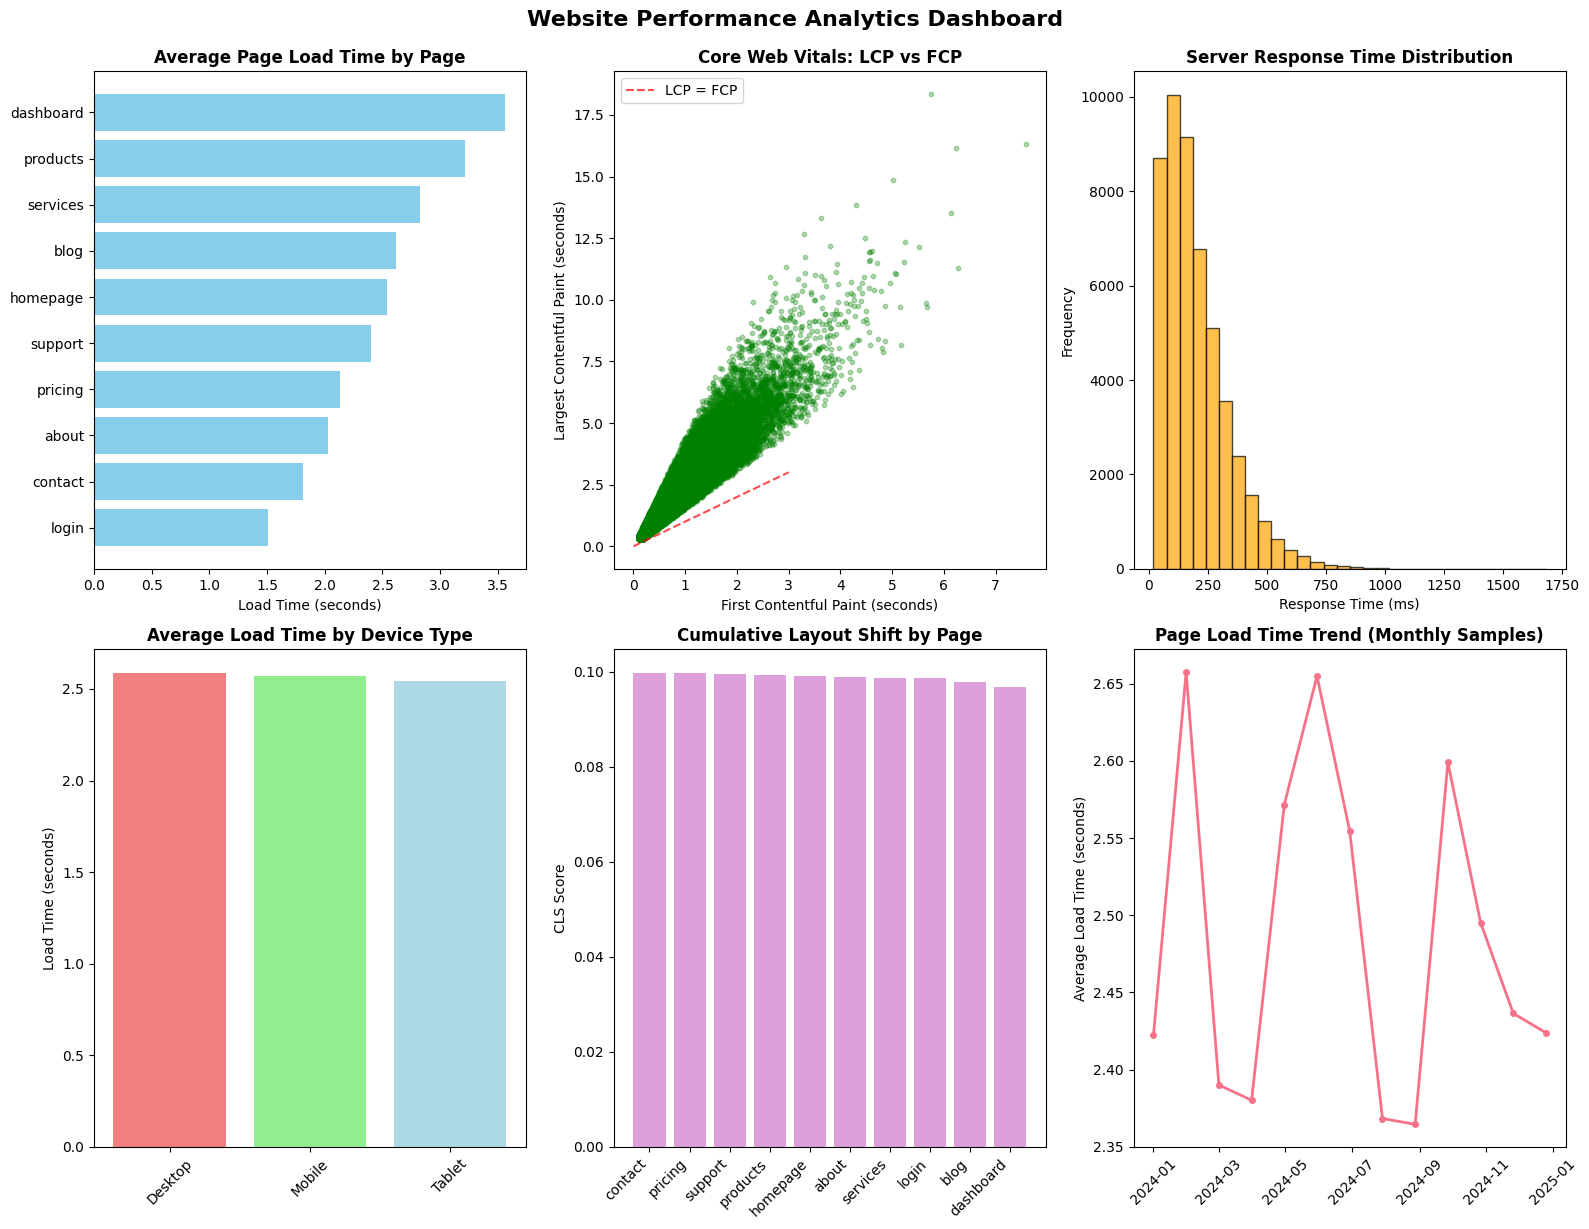

📊 Page performance visualizations generated successfully


In [5]:
# Page Performance Visualizations

plt.figure(figsize=(16, 12))

# 1. Average page load time by page
plt.subplot(2, 3, 1)
page_load_avg = website_data.groupby('page_name')['page_load_time'].mean().sort_values()
plt.barh(range(len(page_load_avg)), page_load_avg.values, color='skyblue')
plt.yticks(range(len(page_load_avg)), page_load_avg.index)
plt.title('Average Page Load Time by Page', fontweight='bold')
plt.xlabel('Load Time (seconds)')

# 2. Core Web Vitals - LCP vs FCP
plt.subplot(2, 3, 2)
plt.scatter(website_data['first_contentful_paint'], website_data['largest_contentful_paint'], 
           alpha=0.3, c='green', s=10)
plt.xlabel('First Contentful Paint (seconds)')
plt.ylabel('Largest Contentful Paint (seconds)')
plt.title('Core Web Vitals: LCP vs FCP', fontweight='bold')
plt.plot([0, 3], [0, 3], 'r--', alpha=0.7, label='LCP = FCP')
plt.legend()

# 3. Server response time distribution
plt.subplot(2, 3, 3)
plt.hist(website_data['server_response_time'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Server Response Time Distribution', fontweight='bold')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')

# 4. Performance by device type
plt.subplot(2, 3, 4)
device_performance = website_data.groupby('device_type')['page_load_time'].mean()
plt.bar(device_performance.index, device_performance.values, color=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Average Load Time by Device Type', fontweight='bold')
plt.ylabel('Load Time (seconds)')
plt.xticks(rotation=45)

# 5. CLS (Cumulative Layout Shift) by page
plt.subplot(2, 3, 5)
cls_by_page = website_data.groupby('page_name')['cumulative_layout_shift'].mean().sort_values(ascending=False)
plt.bar(range(len(cls_by_page)), cls_by_page.values, color='plum')
plt.xticks(range(len(cls_by_page)), cls_by_page.index, rotation=45, ha='right')
plt.title('Cumulative Layout Shift by Page', fontweight='bold')
plt.ylabel('CLS Score')

# 6. Performance trends over time (daily averages)
plt.subplot(2, 3, 6)
website_data['date'] = website_data['timestamp'].dt.date
daily_performance = website_data.groupby('date')['page_load_time'].mean()
# Sample every 30th day for readability
sample_dates = daily_performance.iloc[::30]
plt.plot(sample_dates.index, sample_dates.values, marker='o', linewidth=2, markersize=4)
plt.title('Page Load Time Trend (Monthly Samples)', fontweight='bold')
plt.ylabel('Average Load Time (seconds)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Website Performance Analytics Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("📊 Page performance visualizations generated successfully")

# Contains AI-generated edits.

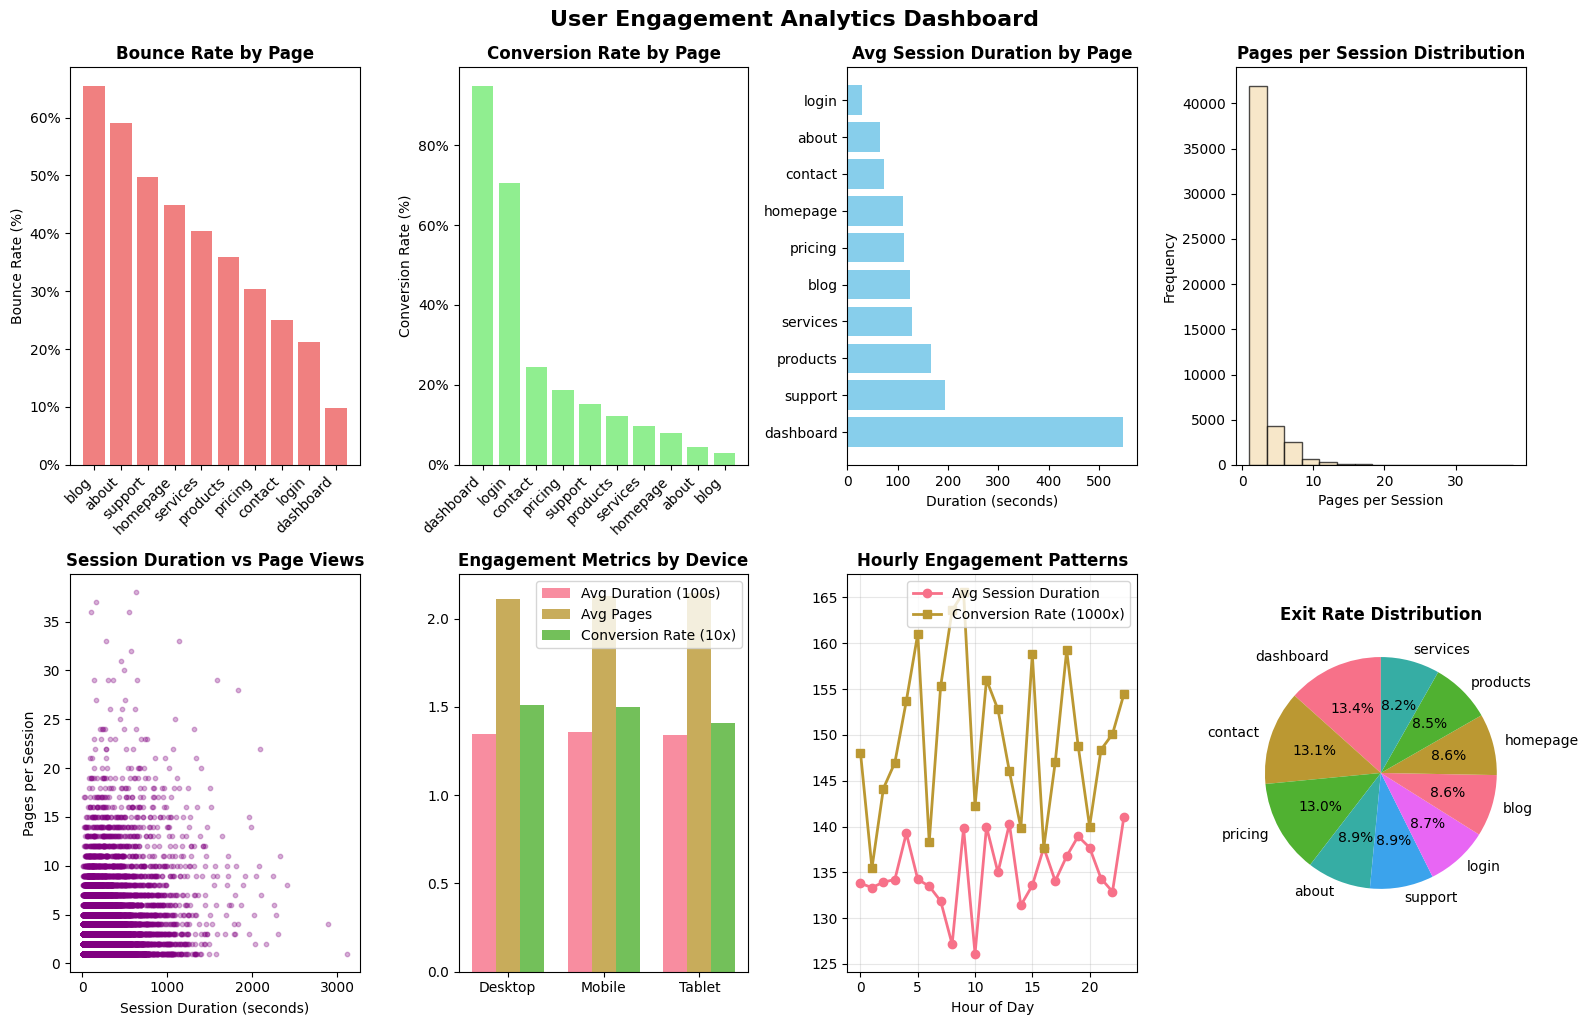

🎯 User Engagement Insights:
📊 Overall bounce rate: 42.9%
🎯 Overall conversion rate: 15.0%
⏱️ Average session duration: 135 seconds
📄 Average pages per session: 2.1

🏆 Top performing pages:
   • dashboard: 94.7% conversion rate
   • login: 70.5% conversion rate
   • contact: 24.5% conversion rate

⚠️ Pages needing attention (high bounce rate):
   • blog: 65.4% bounce rate
   • about: 59.1% bounce rate
   • support: 49.8% bounce rate

📊 User engagement analysis completed


In [6]:
# User Engagement Analysis

plt.figure(figsize=(16, 10))

# 1. Bounce rate by page
plt.subplot(2, 4, 1)
bounce_rate = website_data.groupby('page_name')['is_bounce'].mean().sort_values(ascending=False)
plt.bar(range(len(bounce_rate)), bounce_rate.values, color='lightcoral')
plt.xticks(range(len(bounce_rate)), bounce_rate.index, rotation=45, ha='right')
plt.title('Bounce Rate by Page', fontweight='bold')
plt.ylabel('Bounce Rate (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 2. Conversion rate by page
plt.subplot(2, 4, 2)
conversion_rate = website_data.groupby('page_name')['is_conversion'].mean().sort_values(ascending=False)
plt.bar(range(len(conversion_rate)), conversion_rate.values, color='lightgreen')
plt.xticks(range(len(conversion_rate)), conversion_rate.index, rotation=45, ha='right')
plt.title('Conversion Rate by Page', fontweight='bold')
plt.ylabel('Conversion Rate (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 3. Average session duration by page
plt.subplot(2, 4, 3)
session_duration = website_data.groupby('page_name')['session_duration'].mean().sort_values(ascending=False)
plt.barh(range(len(session_duration)), session_duration.values, color='skyblue')
plt.yticks(range(len(session_duration)), session_duration.index)
plt.title('Avg Session Duration by Page', fontweight='bold')
plt.xlabel('Duration (seconds)')

# 4. Pages per session distribution
plt.subplot(2, 4, 4)
plt.hist(website_data['pages_per_session'], bins=15, alpha=0.7, color='wheat', edgecolor='black')
plt.title('Pages per Session Distribution', fontweight='bold')
plt.xlabel('Pages per Session')
plt.ylabel('Frequency')

# 5. Session duration vs page views scatter
plt.subplot(2, 4, 5)
plt.scatter(website_data['session_duration'], website_data['pages_per_session'], 
           alpha=0.3, c='purple', s=10)
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Pages per Session')
plt.title('Session Duration vs Page Views', fontweight='bold')

# 6. Engagement by device type
plt.subplot(2, 4, 6)
device_engagement = website_data.groupby('device_type').agg({
    'session_duration': 'mean',
    'pages_per_session': 'mean',
    'is_conversion': 'mean'
})

x = np.arange(len(device_engagement))
width = 0.25

plt.bar(x - width, device_engagement['session_duration']/100, width, label='Avg Duration (100s)', alpha=0.8)
plt.bar(x, device_engagement['pages_per_session'], width, label='Avg Pages', alpha=0.8)
plt.bar(x + width, device_engagement['is_conversion']*10, width, label='Conversion Rate (10x)', alpha=0.8)

plt.xticks(x, device_engagement.index)
plt.title('Engagement Metrics by Device', fontweight='bold')
plt.legend()

# 7. Hourly engagement patterns
plt.subplot(2, 4, 7)
hourly_engagement = website_data.groupby('hour_of_day').agg({
    'session_duration': 'mean',
    'is_conversion': 'mean'
})

plt.plot(hourly_engagement.index, hourly_engagement['session_duration'], 
         marker='o', label='Avg Session Duration', linewidth=2)
plt.plot(hourly_engagement.index, hourly_engagement['is_conversion']*1000, 
         marker='s', label='Conversion Rate (1000x)', linewidth=2)
plt.xlabel('Hour of Day')
plt.title('Hourly Engagement Patterns', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Exit rate by page
plt.subplot(2, 4, 8)
exit_rate = website_data.groupby('page_name')['is_exit'].mean().sort_values(ascending=False)
plt.pie(exit_rate.values, labels=exit_rate.index, autopct='%1.1f%%', startangle=90)
plt.title('Exit Rate Distribution', fontweight='bold')

plt.tight_layout()
plt.suptitle('User Engagement Analytics Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Print engagement insights
print("🎯 User Engagement Insights:")
print("=" * 40)
print(f"📊 Overall bounce rate: {website_data['is_bounce'].mean():.1%}")
print(f"🎯 Overall conversion rate: {website_data['is_conversion'].mean():.1%}")
print(f"⏱️ Average session duration: {website_data['session_duration'].mean():.0f} seconds")
print(f"📄 Average pages per session: {website_data['pages_per_session'].mean():.1f}")

print(f"\n🏆 Top performing pages:")
top_conversion = conversion_rate.head(3)
for page, rate in top_conversion.items():
    print(f"   • {page}: {rate:.1%} conversion rate")

print(f"\n⚠️ Pages needing attention (high bounce rate):")
high_bounce = bounce_rate.head(3)
for page, rate in high_bounce.items():
    print(f"   • {page}: {rate:.1%} bounce rate")

print("\n📊 User engagement analysis completed")

# Contains AI-generated edits.

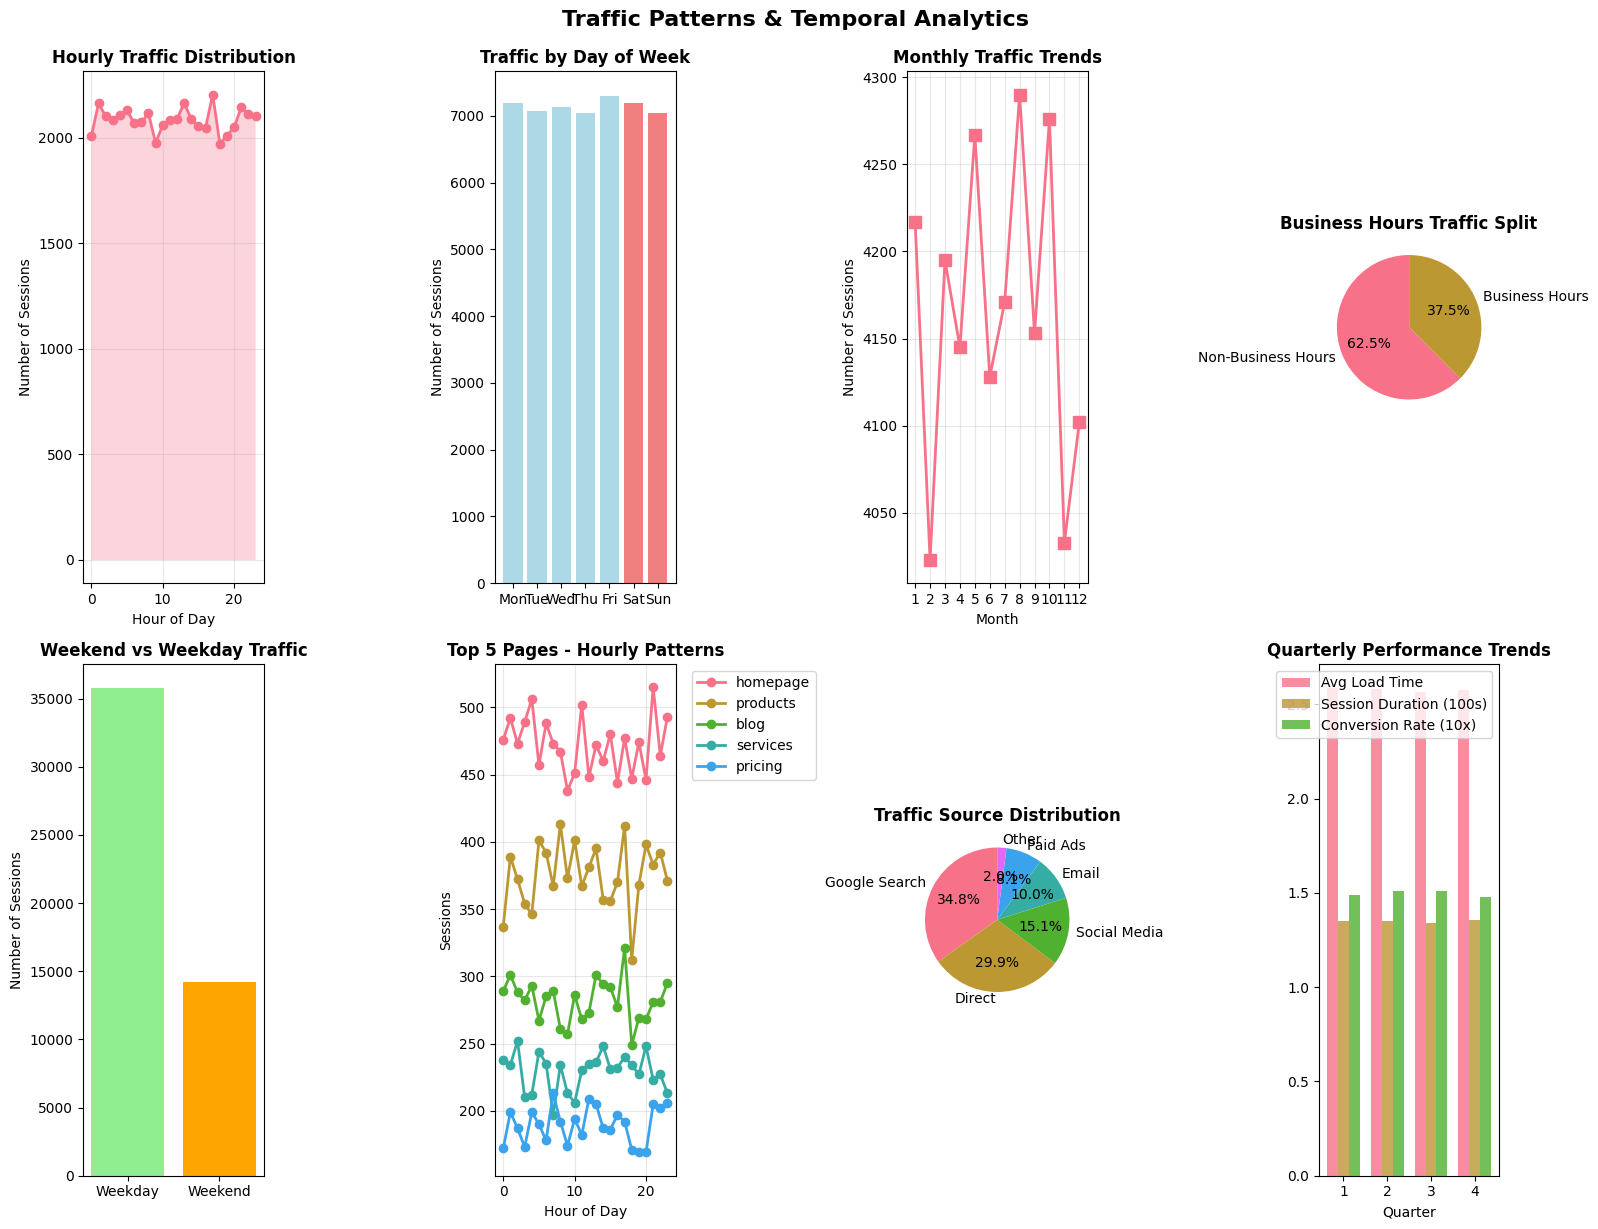

📈 Traffic Pattern Insights:
⏰ Peak traffic hour: 17:00 (2,204 sessions)
📅 Peak traffic day: Fri (7,304 sessions)
📆 Peak traffic month: Month 8 (4,290 sessions)

🏢 Business hours traffic: 37.5%
🎯 Weekend traffic: 28.5%

🔝 Top traffic sources:
   • Google Search: 17,416 sessions (34.8%)
   • Direct: 14,973 sessions (29.9%)
   • Social Media: 7,559 sessions (15.1%)

📊 Traffic patterns analysis completed


In [7]:
# Traffic Patterns & Temporal Trends

plt.figure(figsize=(16, 12))

# 1. Hourly traffic distribution
plt.subplot(2, 4, 1)
hourly_traffic = website_data['hour_of_day'].value_counts().sort_index()
plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', linewidth=2, markersize=6)
plt.fill_between(hourly_traffic.index, hourly_traffic.values, alpha=0.3)
plt.title('Hourly Traffic Distribution', fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.grid(True, alpha=0.3)

# 2. Daily traffic patterns (day of week)
plt.subplot(2, 4, 2)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_traffic = website_data['day_of_week'].value_counts().sort_index()
plt.bar(range(len(daily_traffic)), daily_traffic.values, 
        color=['lightblue' if i < 5 else 'lightcoral' for i in range(7)])
plt.xticks(range(len(day_names)), day_names)
plt.title('Traffic by Day of Week', fontweight='bold')
plt.ylabel('Number of Sessions')

# 3. Monthly traffic trends
plt.subplot(2, 4, 3)
website_data['month'] = website_data['timestamp'].dt.month
monthly_traffic = website_data['month'].value_counts().sort_index()
plt.plot(monthly_traffic.index, monthly_traffic.values, marker='s', linewidth=2, markersize=8)
plt.title('Monthly Traffic Trends', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 4. Business hours vs non-business hours
plt.subplot(2, 4, 4)
business_hours_traffic = website_data['is_business_hours'].value_counts()
labels = ['Non-Business Hours', 'Business Hours']
plt.pie(business_hours_traffic.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Business Hours Traffic Split', fontweight='bold')

# 5. Weekend vs weekday traffic patterns
plt.subplot(2, 4, 5)
weekend_traffic = website_data['is_weekend'].value_counts()
weekend_labels = ['Weekday', 'Weekend']
colors = ['lightgreen', 'orange']
plt.bar(weekend_labels, weekend_traffic.values, color=colors)
plt.title('Weekend vs Weekday Traffic', fontweight='bold')
plt.ylabel('Number of Sessions')

# 6. Page popularity over time (top 5 pages)
plt.subplot(2, 4, 6)
top_pages = website_data['page_name'].value_counts().head(5).index
for page in top_pages:
    page_data = website_data[website_data['page_name'] == page]
    page_hourly = page_data['hour_of_day'].value_counts().sort_index()
    plt.plot(page_hourly.index, page_hourly.values, marker='o', label=page, linewidth=2)

plt.title('Top 5 Pages - Hourly Patterns', fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Sessions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 7. Traffic source distribution
plt.subplot(2, 4, 7)
referrer_counts = website_data['referrer_source'].value_counts()
plt.pie(referrer_counts.values, labels=referrer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Traffic Source Distribution', fontweight='bold')

# 8. Seasonal patterns (quarterly view)
plt.subplot(2, 4, 8)
website_data['quarter'] = website_data['timestamp'].dt.quarter
quarterly_metrics = website_data.groupby('quarter').agg({
    'page_load_time': 'mean',
    'session_duration': 'mean',
    'is_conversion': 'mean'
}).round(3)

x = quarterly_metrics.index
width = 0.25

plt.bar(x - width, quarterly_metrics['page_load_time'], width, label='Avg Load Time', alpha=0.8)
plt.bar(x, quarterly_metrics['session_duration']/100, width, label='Session Duration (100s)', alpha=0.8)
plt.bar(x + width, quarterly_metrics['is_conversion']*10, width, label='Conversion Rate (10x)', alpha=0.8)

plt.xlabel('Quarter')
plt.title('Quarterly Performance Trends', fontweight='bold')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.suptitle('Traffic Patterns & Temporal Analytics', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Traffic insights
print("📈 Traffic Pattern Insights:")
print("=" * 40)

peak_hour = hourly_traffic.idxmax()
peak_day = daily_traffic.idxmax()
peak_month = monthly_traffic.idxmax()

print(f"⏰ Peak traffic hour: {peak_hour}:00 ({hourly_traffic[peak_hour]:,} sessions)")
print(f"📅 Peak traffic day: {day_names[peak_day]} ({daily_traffic[peak_day]:,} sessions)")
print(f"📆 Peak traffic month: Month {peak_month} ({monthly_traffic[peak_month]:,} sessions)")

business_pct = website_data['is_business_hours'].mean() * 100
weekend_pct = website_data['is_weekend'].mean() * 100

print(f"\n🏢 Business hours traffic: {business_pct:.1f}%")
print(f"🎯 Weekend traffic: {weekend_pct:.1f}%")

print(f"\n🔝 Top traffic sources:")
for source, count in referrer_counts.head(3).items():
    pct = count / len(website_data) * 100
    print(f"   • {source}: {count:,} sessions ({pct:.1f}%)")

print("\n📊 Traffic patterns analysis completed")

# Contains AI-generated edits.

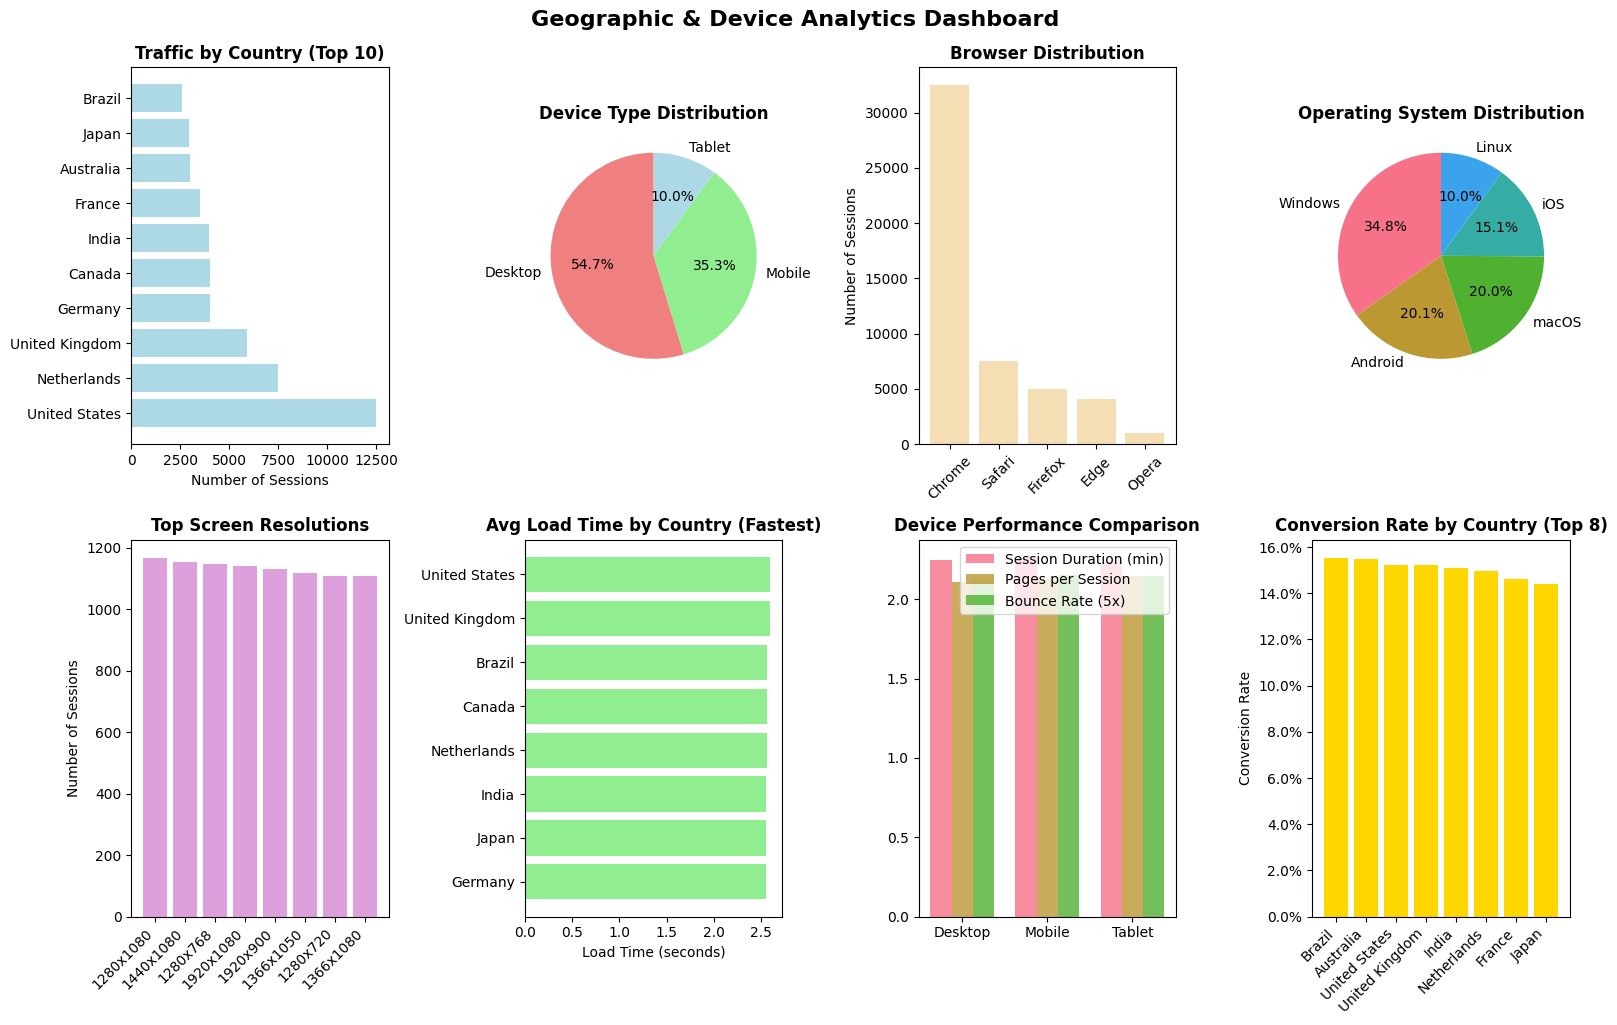

🌍 Geographic & Device Insights:
🌎 Top traffic country: United States (12,521 sessions)
📱 Most used device: Desktop (54.7%)
🌐 Most used browser: Chrome (64.9%)

📊 Device Performance Summary:
   • Desktop: 135s avg session, 42.7% bounce rate
   • Mobile: 136s avg session, 43.1% bounce rate
   • Tablet: 134s avg session, 43.0% bounce rate

⚡ Fastest loading country: Germany (2.55s)
🐌 Slowest loading country: France (2.60s)

🎯 Top converting countries:
   • Brazil: 15.5% conversion rate
   • Australia: 15.5% conversion rate
   • United States: 15.2% conversion rate

🌍 Geographic and device analytics completed


In [9]:
# Geographic & Device Analytics

plt.figure(figsize=(16, 10))

# 1. Geographic distribution
plt.subplot(2, 4, 1)
country_traffic = website_data['country'].value_counts().head(10)
plt.barh(range(len(country_traffic)), country_traffic.values, color='lightblue')
plt.yticks(range(len(country_traffic)), country_traffic.index)
plt.title('Traffic by Country (Top 10)', fontweight='bold')
plt.xlabel('Number of Sessions')

# 2. Device type distribution
plt.subplot(2, 4, 2)
device_dist = website_data['device_type'].value_counts()
colors = ['lightcoral', 'lightgreen', 'lightblue']
plt.pie(device_dist.values, labels=device_dist.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Device Type Distribution', fontweight='bold')

# 3. Browser market share
plt.subplot(2, 4, 3)
browser_dist = website_data['browser'].value_counts()
plt.bar(browser_dist.index, browser_dist.values, color='wheat')
plt.title('Browser Distribution', fontweight='bold')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)

# 4. Operating system distribution
plt.subplot(2, 4, 4)
os_dist = website_data['operating_system'].value_counts()
plt.pie(os_dist.values, labels=os_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Operating System Distribution', fontweight='bold')

# 5. Screen resolution analysis (most common resolutions)
plt.subplot(2, 4, 5)
website_data['resolution'] = website_data['screen_width'].astype(str) + 'x' + website_data['screen_height'].astype(str)
resolution_counts = website_data['resolution'].value_counts().head(8)
plt.bar(range(len(resolution_counts)), resolution_counts.values, color='plum')
plt.xticks(range(len(resolution_counts)), resolution_counts.index, rotation=45, ha='right')
plt.title('Top Screen Resolutions', fontweight='bold')
plt.ylabel('Number of Sessions')

# 6. Performance by geographic region
plt.subplot(2, 4, 6)
geo_performance = website_data.groupby('country')['page_load_time'].mean().sort_values()
top_geo_perf = geo_performance.head(8)
plt.barh(range(len(top_geo_perf)), top_geo_perf.values, color='lightgreen')
plt.yticks(range(len(top_geo_perf)), top_geo_perf.index)
plt.title('Avg Load Time by Country (Fastest)', fontweight='bold')
plt.xlabel('Load Time (seconds)')

# 7. Device engagement comparison
plt.subplot(2, 4, 7)
device_metrics = website_data.groupby('device_type').agg({
    'session_duration': 'mean',
    'pages_per_session': 'mean',
    'is_bounce': 'mean'
})

x = np.arange(len(device_metrics))
width = 0.25

plt.bar(x - width, device_metrics['session_duration']/60, width, label='Session Duration (min)', alpha=0.8)
plt.bar(x, device_metrics['pages_per_session'], width, label='Pages per Session', alpha=0.8)
plt.bar(x + width, device_metrics['is_bounce']*5, width, label='Bounce Rate (5x)', alpha=0.8)

plt.xticks(x, device_metrics.index)
plt.title('Device Performance Comparison', fontweight='bold')
plt.legend()

# 8. Geographic conversion rates
plt.subplot(2, 4, 8)
geo_conversion = website_data.groupby('country')['is_conversion'].mean().sort_values(ascending=False)
top_geo_conv = geo_conversion.head(8)
plt.bar(range(len(top_geo_conv)), top_geo_conv.values, color='gold')
plt.xticks(range(len(top_geo_conv)), top_geo_conv.index, rotation=45, ha='right')
plt.title('Conversion Rate by Country (Top 8)', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.tight_layout()
plt.suptitle('Geographic & Device Analytics Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Geographic and device insights
print("🌍 Geographic & Device Insights:")
print("=" * 40)

top_country = country_traffic.index[0]
top_device = device_dist.index[0]
top_browser = browser_dist.index[0]

print(f"🌎 Top traffic country: {top_country} ({country_traffic.iloc[0]:,} sessions)")
print(f"📱 Most used device: {top_device} ({device_dist.iloc[0]/len(website_data)*100:.1f}%)")
print(f"🌐 Most used browser: {top_browser} ({browser_dist.iloc[0]/len(website_data)*100:.1f}%)")

# Device performance comparison
print(f"\n📊 Device Performance Summary:")
for device in device_metrics.index:
    avg_session = device_metrics.loc[device, 'session_duration']
    bounce_rate = device_metrics.loc[device, 'is_bounce']
    print(f"   • {device}: {avg_session:.0f}s avg session, {bounce_rate:.1%} bounce rate")

# Geographic performance insights
fastest_country = geo_performance.index[0]
slowest_country = geo_performance.index[-1]
print(f"\n⚡ Fastest loading country: {fastest_country} ({geo_performance.iloc[0]:.2f}s)")
print(f"🐌 Slowest loading country: {slowest_country} ({geo_performance.iloc[-1]:.2f}s)")

print(f"\n🎯 Top converting countries:")
for country, rate in top_geo_conv.head(3).items():
    print(f"   • {country}: {rate:.1%} conversion rate")

print("\n🌍 Geographic and device analytics completed")

# Contains AI-generated edits.

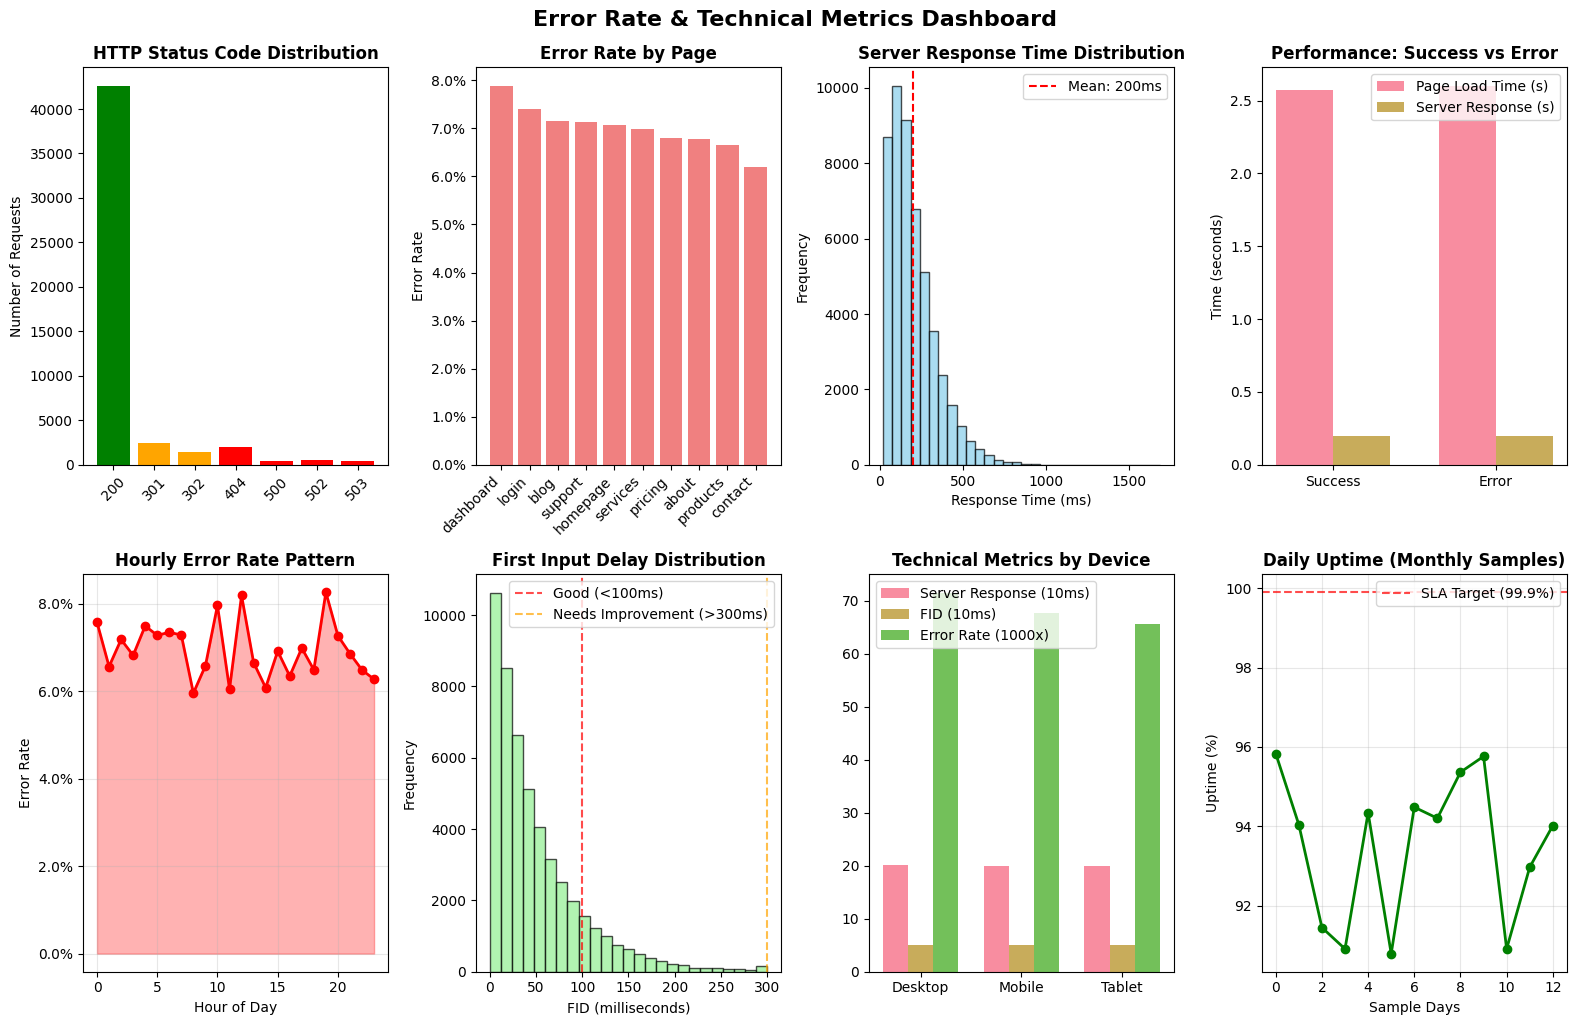

⚙️ Technical Performance Insights:
❌ Overall error rate: 6.95%
⚡ Average server response time: 200ms
🖱️ Average First Input Delay: 50.0ms

📊 HTTP Status Code Breakdown:
   • 200 (Success): 42,557 requests (85.1%)
   • 301 (Redirect): 2,470 requests (4.9%)
   • 302 (Redirect): 1,497 requests (3.0%)
   • 404 (Not Found): 2,029 requests (4.1%)
   • 500 (Server Error): 470 requests (0.9%)
   • 502 (Bad Gateway): 504 requests (1.0%)
   • 503 (Service Unavailable): 473 requests (0.9%)

🎯 Core Web Vitals Performance:
   • Good FCP (≤1.8s): 93.5%
   • Good LCP (≤2.5s): 73.2%
   • Good CLS (≤0.1): 63.6%
   • Good FID (≤100ms): 86.4%

⚠️ Areas Needing Attention:
   • Highest error rate: dashboard (7.9%)
   • Peak error time: 19:00 (8.3% error rate)

⚙️ Technical metrics analysis completed


In [10]:
# Error Rate & Technical Metrics

plt.figure(figsize=(16, 10))

# 1. HTTP Status Code Distribution
plt.subplot(2, 4, 1)
status_counts = website_data['http_status_code'].value_counts().sort_index()
colors = ['green' if x == 200 else 'orange' if x < 400 else 'red' for x in status_counts.index]
plt.bar(status_counts.index.astype(str), status_counts.values, color=colors)
plt.title('HTTP Status Code Distribution', fontweight='bold')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)

# 2. Error Rate by Page
plt.subplot(2, 4, 2)
error_rate_by_page = website_data.groupby('page_name')['is_error'].mean().sort_values(ascending=False)
plt.bar(range(len(error_rate_by_page)), error_rate_by_page.values, color='lightcoral')
plt.xticks(range(len(error_rate_by_page)), error_rate_by_page.index, rotation=45, ha='right')
plt.title('Error Rate by Page', fontweight='bold')
plt.ylabel('Error Rate')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# 3. Server Response Time Distribution
plt.subplot(2, 4, 3)
plt.hist(website_data['server_response_time'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(website_data['server_response_time'].mean(), color='red', linestyle='--', 
           label=f'Mean: {website_data["server_response_time"].mean():.0f}ms')
plt.title('Server Response Time Distribution', fontweight='bold')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.legend()

# 4. Performance vs Error Correlation
plt.subplot(2, 4, 4)
error_performance = website_data.groupby('is_error').agg({
    'page_load_time': 'mean',
    'server_response_time': 'mean'
})

x = ['Success', 'Error']
width = 0.35

plt.bar(np.arange(len(x)) - width/2, error_performance['page_load_time'], 
        width, label='Page Load Time (s)', alpha=0.8)
plt.bar(np.arange(len(x)) + width/2, error_performance['server_response_time']/1000, 
        width, label='Server Response (s)', alpha=0.8)

plt.xticks(np.arange(len(x)), x)
plt.title('Performance: Success vs Error', fontweight='bold')
plt.ylabel('Time (seconds)')
plt.legend()

# 5. Hourly Error Rate Patterns
plt.subplot(2, 4, 5)
hourly_errors = website_data.groupby('hour_of_day')['is_error'].mean()
plt.plot(hourly_errors.index, hourly_errors.values, marker='o', linewidth=2, color='red')
plt.fill_between(hourly_errors.index, hourly_errors.values, alpha=0.3, color='red')
plt.title('Hourly Error Rate Pattern', fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Error Rate')
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# 6. First Input Delay Distribution
plt.subplot(2, 4, 6)
plt.hist(website_data['first_input_delay'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(100, color='red', linestyle='--', label='Good (<100ms)', alpha=0.7)
plt.axvline(300, color='orange', linestyle='--', label='Needs Improvement (>300ms)', alpha=0.7)
plt.title('First Input Delay Distribution', fontweight='bold')
plt.xlabel('FID (milliseconds)')
plt.ylabel('Frequency')
plt.legend()

# 7. Technical Performance by Device
plt.subplot(2, 4, 7)
device_tech_metrics = website_data.groupby('device_type').agg({
    'server_response_time': 'mean',
    'first_input_delay': 'mean',
    'is_error': 'mean'
})

x = np.arange(len(device_tech_metrics))
width = 0.25

plt.bar(x - width, device_tech_metrics['server_response_time']/10, width, 
        label='Server Response (10ms)', alpha=0.8)
plt.bar(x, device_tech_metrics['first_input_delay']/10, width, 
        label='FID (10ms)', alpha=0.8)
plt.bar(x + width, device_tech_metrics['is_error']*1000, width, 
        label='Error Rate (1000x)', alpha=0.8)

plt.xticks(x, device_tech_metrics.index)
plt.title('Technical Metrics by Device', fontweight='bold')
plt.legend()

# 8. Uptime Simulation (Daily Success Rate)
plt.subplot(2, 4, 8)
website_data['date'] = website_data['timestamp'].dt.date
daily_uptime = website_data.groupby('date')['is_error'].apply(lambda x: (1 - x.mean()) * 100)
# Sample every 30 days for readability
sample_uptime = daily_uptime.iloc[::30]

plt.plot(range(len(sample_uptime)), sample_uptime.values, marker='o', linewidth=2, color='green')
plt.axhline(99.9, color='red', linestyle='--', label='SLA Target (99.9%)', alpha=0.7)
plt.title('Daily Uptime (Monthly Samples)', fontweight='bold')
plt.ylabel('Uptime (%)')
plt.xlabel('Sample Days')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Error Rate & Technical Metrics Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Technical metrics insights
print("⚙️ Technical Performance Insights:")
print("=" * 40)

overall_error_rate = website_data['is_error'].mean()
avg_response_time = website_data['server_response_time'].mean()
avg_fid = website_data['first_input_delay'].mean()

print(f"❌ Overall error rate: {overall_error_rate:.2%}")
print(f"⚡ Average server response time: {avg_response_time:.0f}ms")
print(f"🖱️ Average First Input Delay: {avg_fid:.1f}ms")

# Status code breakdown
print(f"\n📊 HTTP Status Code Breakdown:")
for status, count in status_counts.items():
    pct = count / len(website_data) * 100
    status_name = {200: 'Success', 301: 'Redirect', 302: 'Redirect', 404: 'Not Found', 
                   500: 'Server Error', 502: 'Bad Gateway', 503: 'Service Unavailable'}.get(status, 'Other')
    print(f"   • {status} ({status_name}): {count:,} requests ({pct:.1f}%)")

# Core Web Vitals assessment
good_fcp = (website_data['first_contentful_paint'] <= 1.8).mean() * 100
good_lcp = (website_data['largest_contentful_paint'] <= 2.5).mean() * 100
good_cls = (website_data['cumulative_layout_shift'] <= 0.1).mean() * 100
good_fid = (website_data['first_input_delay'] <= 100).mean() * 100

print(f"\n🎯 Core Web Vitals Performance:")
print(f"   • Good FCP (≤1.8s): {good_fcp:.1f}%")
print(f"   • Good LCP (≤2.5s): {good_lcp:.1f}%")
print(f"   • Good CLS (≤0.1): {good_cls:.1f}%")
print(f"   • Good FID (≤100ms): {good_fid:.1f}%")

# Identify problem areas
worst_error_page = error_rate_by_page.index[0]
worst_error_rate = error_rate_by_page.iloc[0]

print(f"\n⚠️ Areas Needing Attention:")
print(f"   • Highest error rate: {worst_error_page} ({worst_error_rate:.1%})")

peak_error_hour = hourly_errors.idxmax()
peak_error_rate = hourly_errors.max()
print(f"   • Peak error time: {peak_error_hour}:00 ({peak_error_rate:.1%} error rate)")

print("\n⚙️ Technical metrics analysis completed")

# Contains AI-generated edits.

In [11]:
# Summary Statistics & Data Validation

print("=" * 80)
print("📊 COMPREHENSIVE WEBSITE ANALYTICS SUMMARY")
print("=" * 80)

# Dataset Overview
print(f"\n📈 DATASET OVERVIEW")
print("-" * 40)
print(f"📊 Total analytics records: {len(website_data):,}")
print(f"📅 Date range: {website_data['timestamp'].min().strftime('%Y-%m-%d')} to {website_data['timestamp'].max().strftime('%Y-%m-%d')}")
print(f"🌐 Pages tracked: {website_data['page_name'].nunique()} unique pages")
print(f"🔗 Total sessions: {website_data['session_id'].nunique():,}")
print(f"📊 Data points per record: {len(website_data.columns)} metrics")

# Performance Summary
print(f"\n⚡ PERFORMANCE METRICS SUMMARY")
print("-" * 40)
print(f"🚀 Average page load time: {website_data['page_load_time'].mean():.2f} seconds")
print(f"📊 Load time range: {website_data['page_load_time'].min():.2f}s - {website_data['page_load_time'].max():.2f}s")
print(f"🔥 95th percentile load time: {website_data['page_load_time'].quantile(0.95):.2f} seconds")

print(f"\n📱 Core Web Vitals Performance:")
print(f"   • First Contentful Paint: {website_data['first_contentful_paint'].mean():.3f}s avg")
print(f"   • Largest Contentful Paint: {website_data['largest_contentful_paint'].mean():.3f}s avg")
print(f"   • Cumulative Layout Shift: {website_data['cumulative_layout_shift'].mean():.3f} avg")
print(f"   • First Input Delay: {website_data['first_input_delay'].mean():.1f}ms avg")

# Engagement Summary
print(f"\n🎯 USER ENGAGEMENT SUMMARY")
print("-" * 40)
print(f"⏱️ Average session duration: {website_data['session_duration'].mean():.0f} seconds")
print(f"📄 Average pages per session: {website_data['pages_per_session'].mean():.1f}")
print(f"⚡ Bounce rate: {website_data['is_bounce'].mean():.1%}")
print(f"🎯 Conversion rate: {website_data['is_conversion'].mean():.1%}")
print(f"🚪 Exit rate: {website_data['is_exit'].mean():.1%}")

# Traffic Summary
print(f"\n📊 TRAFFIC ANALYTICS SUMMARY")
print("-" * 40)
print(f"🏢 Business hours traffic: {website_data['is_business_hours'].mean():.1%}")
print(f"🌴 Weekend traffic: {website_data['is_weekend'].mean():.1%}")

print(f"\n📱 Device & Technology:")
device_breakdown = website_data['device_type'].value_counts()
for device, count in device_breakdown.items():
    print(f"   • {device}: {count:,} sessions ({count/len(website_data)*100:.1f}%)")

print(f"\n🌍 Geographic Distribution (Top 5):")
geo_breakdown = website_data['country'].value_counts().head(5)
for country, count in geo_breakdown.items():
    print(f"   • {country}: {count:,} sessions ({count/len(website_data)*100:.1f}%)")

# Page Performance Ranking
print(f"\n🏆 PAGE PERFORMANCE RANKING")
print("-" * 40)
page_performance = website_data.groupby('page_name').agg({
    'page_load_time': 'mean',
    'is_bounce': 'mean',
    'is_conversion': 'mean',
    'session_duration': 'mean'
}).round(3)

print(f"🚀 Fastest Loading Pages:")
fastest_pages = page_performance.sort_values('page_load_time').head(3)
for page, metrics in fastest_pages.iterrows():
    print(f"   • {page}: {metrics['page_load_time']:.2f}s load time")

print(f"\n🎯 Highest Converting Pages:")
converting_pages = page_performance.sort_values('is_conversion', ascending=False).head(3)
for page, metrics in converting_pages.iterrows():
    print(f"   • {page}: {metrics['is_conversion']:.1%} conversion rate")

print(f"\n⚠️ Pages with Highest Bounce Rate:")
bouncy_pages = page_performance.sort_values('is_bounce', ascending=False).head(3)
for page, metrics in bouncy_pages.iterrows():
    print(f"   • {page}: {metrics['is_bounce']:.1%} bounce rate")

# Technical Quality Summary
print(f"\n⚙️ TECHNICAL QUALITY SUMMARY")
print("-" * 40)
print(f"✅ Overall success rate: {(website_data['http_status_code'] == 200).mean():.1%}")
print(f"❌ Overall error rate: {website_data['is_error'].mean():.1%}")
print(f"⚡ Average server response: {website_data['server_response_time'].mean():.0f}ms")

# Data Quality Validation
print(f"\n✅ DATA QUALITY VALIDATION")
print("-" * 40)

# Check for missing values
missing_data = website_data.isnull().sum()
critical_missing = missing_data[missing_data > 0]

if len(critical_missing) == 0:
    print("✅ No missing values detected in any columns")
else:
    print("⚠️ Missing values found:")
    for col, count in critical_missing.items():
        print(f"   • {col}: {count} missing values ({count/len(website_data)*100:.1f}%)")

# Validate data ranges
print(f"\n📏 Data Range Validation:")
validations = [
    ("All page load times positive", (website_data['page_load_time'] > 0).all()),
    ("All session durations realistic (0-3600s)", website_data['session_duration'].between(0, 3600).all()),
    ("All server response times realistic", website_data['server_response_time'].between(0, 5000).all()),
    ("All FID values realistic (0-500ms)", website_data['first_input_delay'].between(0, 500).all()),
    ("All CLS values valid (0-1)", website_data['cumulative_layout_shift'].between(0, 1).all()),
    ("All pages per session realistic", website_data['pages_per_session'].between(1, 50).all()),
    ("All HTTP status codes valid", website_data['http_status_code'].isin(HTTP_STATUS_CODES).all())
]

for validation_name, is_valid in validations:
    status = "✅" if is_valid else "❌"
    print(f"   {status} {validation_name}: {is_valid}")

# Statistical Summary
print(f"\n📊 KEY STATISTICAL INSIGHTS")
print("-" * 40)

# Calculate correlations
correlations = website_data[['page_load_time', 'session_duration', 'pages_per_session', 
                            'server_response_time', 'first_input_delay']].corr()

print(f"🔗 Key Correlations:")
print(f"   • Load time vs Session duration: {correlations.loc['page_load_time', 'session_duration']:.3f}")
print(f"   • Server response vs Load time: {correlations.loc['server_response_time', 'page_load_time']:.3f}")
print(f"   • FID vs Load time: {correlations.loc['first_input_delay', 'page_load_time']:.3f}")

# Seasonal patterns
print(f"\n📅 Temporal Patterns:")
peak_hour = website_data['hour_of_day'].mode().iloc[0]
peak_day = website_data['day_of_week'].mode().iloc[0]
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print(f"   • Peak traffic hour: {peak_hour}:00")
print(f"   • Peak traffic day: {day_names[peak_day]}")
print(f"   • Business hours represent {website_data['is_business_hours'].mean():.1%} of traffic")

# Performance benchmarks
print(f"\n🎯 PERFORMANCE BENCHMARKS")
print("-" * 40)
print(f"📊 Core Web Vitals Assessment:")
cwv_scores = {
    'FCP (Good <1.8s)': (website_data['first_contentful_paint'] <= 1.8).mean() * 100,
    'LCP (Good <2.5s)': (website_data['largest_contentful_paint'] <= 2.5).mean() * 100,
    'FID (Good <100ms)': (website_data['first_input_delay'] <= 100).mean() * 100,
    'CLS (Good <0.1)': (website_data['cumulative_layout_shift'] <= 0.1).mean() * 100
}

for metric, score in cwv_scores.items():
    grade = "🟢" if score >= 75 else "🟡" if score >= 50 else "🔴"
    print(f"   {grade} {metric}: {score:.1f}%")

print(f"\n🎉 DATA GENERATION COMPLETED SUCCESSFULLY!")
print(f"📅 Generated at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 Exported to: synthetic_website_10_key_pages_metrics_telemetry_data.csv")
print("=" * 80)

# Contains AI-generated edits.

📊 COMPREHENSIVE WEBSITE ANALYTICS SUMMARY

📈 DATASET OVERVIEW
----------------------------------------
📊 Total analytics records: 50,000
📅 Date range: 2024-01-01 to 2024-12-31
🌐 Pages tracked: 10 unique pages
🔗 Total sessions: 50,000
📊 Data points per record: 33 metrics

⚡ PERFORMANCE METRICS SUMMARY
----------------------------------------
🚀 Average page load time: 2.58 seconds
📊 Load time range: 0.20s - 20.86s
🔥 95th percentile load time: 6.23 seconds

📱 Core Web Vitals Performance:
   • First Contentful Paint: 0.774s avg
   • Largest Contentful Paint: 1.940s avg
   • Cumulative Layout Shift: 0.099 avg
   • First Input Delay: 50.0ms avg

🎯 USER ENGAGEMENT SUMMARY
----------------------------------------
⏱️ Average session duration: 135 seconds
📄 Average pages per session: 2.1
⚡ Bounce rate: 42.9%
🎯 Conversion rate: 15.0%
🚪 Exit rate: 37.7%

📊 TRAFFIC ANALYTICS SUMMARY
----------------------------------------
🏢 Business hours traffic: 37.5%
🌴 Weekend traffic: 28.5%

📱 Device & Technol